In [ ]:
# Importing the libraries

In [34]:
import pandas as pd
import statistics as st
import matplotlib_inline as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn provides a nice set of color palettes
from scipy.stats import linregress



In [ ]:
# Convertion from Excel file to Csv file

In [5]:
pd.read_excel("Data_Train.xlsx").to_csv("Data_Train1.csv", index=False)

In [6]:
df = pd.read_csv("Data_Train1.csv")

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# Data Cleaning 

In [9]:
print(df.shape)

(10683, 11)


In [10]:
print(df.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [11]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])

C:\Users\16476\AppData\Local\Temp\ipykernel_13864\1954500797.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])


In [12]:
df = df.sort_values(by = "Date_of_Journey", ascending= True).reset_index()

In [13]:
df.head(5)

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,13h 5m,1 stop,No info,26890
1,6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,8h 5m,1 stop,1 Long layover,7744
2,1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,12h 20m,1 stop,No info,27992
3,6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
4,6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,23h 45m,1 stop,No info,25735


In [34]:
df['Airline'].unique()

array(['Jet Airways', 'SpiceJet', 'Air India', 'IndiGo', 'Air Asia',
       'Vistara', 'GoAir', 'Jet Airways Business', 'Multiple carriers',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

In [35]:
total_airlines=df['Airline'].nunique()
total_airlines

12

In [36]:
df['Source'].unique()

array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)

In [37]:
df['Destination'].unique()

array(['New Delhi', 'Kolkata', 'Cochin', 'Banglore', 'Hyderabad', 'Delhi'],
      dtype=object)

In [14]:
start_date = df.iloc[0, 2]
end_date = df.iloc[10681, 2]
diff_date = end_date - start_date
print(start_date, end_date, diff_date)

2019-01-03 00:00:00 2019-12-06 00:00:00 337 days 00:00:00


In [15]:
def time_string_to_float(time_str):
    parts = time_str.split()

    if len(parts) == 2:
        try:
            hours = int(parts[0].replace('h', ''))
            minutes = int(parts[1].replace('m', ''))
            total_hours = hours + minutes / 60.0
            return total_hours
        except ValueError:
            return None
    elif len(parts) == 1 and 'h' in parts[0]:
        hours = int(parts[0].replace("h", ""))
        return hours
    else:
        return None

df["Duration"] = df["Duration"].apply(time_string_to_float)
df.head()




,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,13.083333,1 stop,No info,26890
1,6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,8.083333,1 stop,1 Long layover,7744
2,1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,12.333333,1 stop,No info,27992
3,6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39.083333,2 stops,No info,17135
4,6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,23.750000,1 stop,No info,25735


In [16]:
df["Duration"] = round(df["Duration"], 2)
# print(df["Duration"])

In [17]:
df = df.drop(["Additional_Info"], axis = 1)

In [18]:
print(df["Airline"].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [19]:
print(df["Source"].value_counts())

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [20]:
print(df["Destination"].value_counts())

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [59]:
# Labels for the sections of our pie chart
labels = ["Cochin", "Banglore", "Delhi", "New Delhi","Hyderabad","Kolkata"]

# The values of each section of the pie chart
sizes = [4536, 2871, 1265, 932,696,381]

# The colors of each section of the pie chart
colors = ["Yellow", "Orange", "Red", "Blue","Pink", "Green"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0.1,0.1,0.1,0.1,0.1)

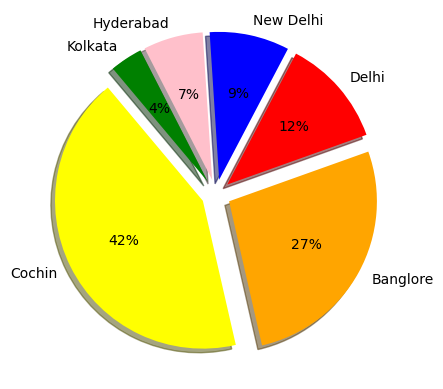

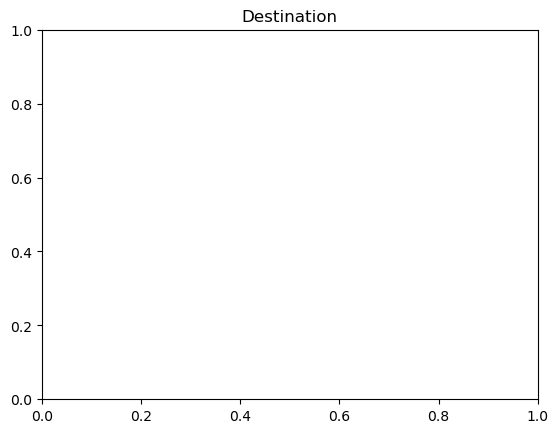

In [60]:
plt.pie(sizes,labels=labels,colors=colors, autopct="%1.f%%",explode=explode, shadow=True, startangle=130)
plt.show()
plt.title('Destination')
plt.savefig("../project1-team1/Fig3.png")


In [21]:
print(df["Route"].value_counts())

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → BBI → HYD             1
BOM → JAI → DEL → HYD       1
CCU → IXB → DEL → BLR       1
CCU → IXZ → MAA → BLR       1
BLR → BOM → IXC → DEL       1
Name: Route, Length: 128, dtype: int64


In [22]:
print(df.isna().sum())

index              0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           1
Total_Stops        1
Price              0
dtype: int64


In [23]:
df = df.dropna(axis = 0, how = "any")

In [27]:
# print(df.isna().sum())

In [24]:
df["Price"].describe()

count    10681.000000
mean      9086.443123
std       4611.075357
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [25]:
print(df.dtypes)

index                       int64
Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                object
Price                       int64
dtype: object


<Axes: xlabel='Airline'>

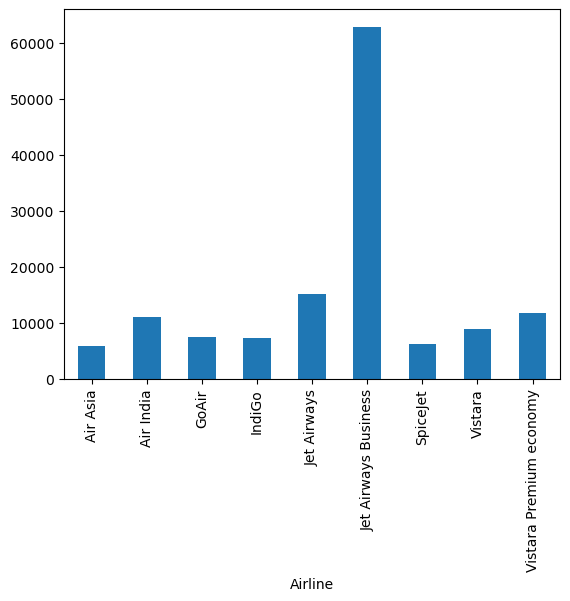

In [26]:
df[(df['Source']=='Banglore') &(df['Destination']=='New Delhi')].groupby(['Airline'])['Price'].mean().plot(kind='bar')

In [28]:
price_duration_comparison=df[(df['Source']=='Banglore') &(df['Destination']=='New Delhi')].groupby("Airline").agg(avg_price = ("Price", "mean"), avg_duration = ("Duration", "mean")).sort_values(by = "avg_price", ascending= False)
price_duration_comparison.round()


,avg_price,avg_duration
Airline,,
Jet Airways Business,62844.0,6.0
Jet Airways,15101.0,13.0
Vistara Premium economy,11793.0,3.0
Air India,11046.0,16.0
Vistara,8947.0,5.0
GoAir,7532.0,3.0
IndiGo,7313.0,3.0
SpiceJet,6224.0,4.0
Air Asia,5792.0,3.0


In [38]:
def plotLinearRegression(x_values,y_values,title,text_position):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regression_values,"r-")
    plt.annotate(line_text,text_position,color="red")
    plt.xlabel("Average Duration")
    plt.ylabel("Average Price (Indian Rupees)")
    plt.title("Average Price / Duration Comparison(Banglore-New Delhi)")
    print(f"The r- value is : {rvalue**2}")
    plt.show()

In [39]:
copy=price_duration_comparison.iloc[1:,:]
copy


,avg_price,avg_duration
Airline,,
Jet Airways,15101.272727,13.364354
Vistara Premium economy,11793.000000,2.580000
Air India,11045.575472,16.215802
Vistara,8947.388889,5.381296
GoAir,7532.333333,3.180000
IndiGo,7312.828025,3.358025
SpiceJet,6223.727273,3.795000
Air Asia,5791.944444,2.790000


The r- value is : 0.45406055530314804


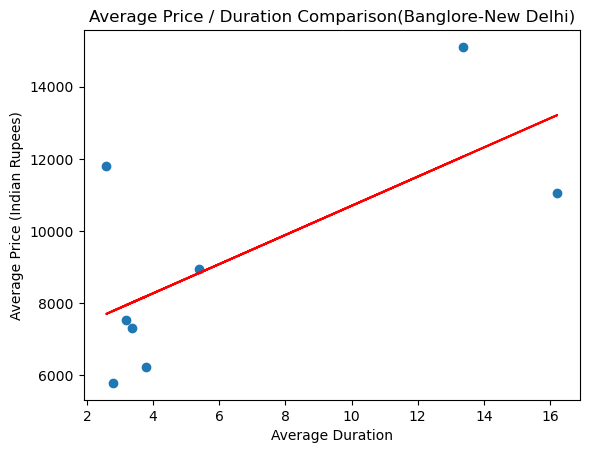

In [40]:
plotLinearRegression(copy["avg_duration"],copy["avg_price"],"avg_duration",(6,-10))
plt.show()

In [30]:
df.groupby("Airline").agg(avg_price = ("Price", "mean"), avg_duration = ("Duration", "mean")).sort_values(by = "avg_price", ascending= False).round()

,avg_price,avg_duration
Airline,,
Jet Airways Business,58359.0,6.0
Jet Airways,11644.0,14.0
Multiple carriers Premium economy,11419.0,10.0
Multiple carriers,10903.0,10.0
Air India,9608.0,16.0
Vistara Premium economy,8962.0,3.0
Vistara,7796.0,10.0
GoAir,5861.0,5.0
IndiGo,5674.0,5.0


In [31]:
df.groupby(["Airline", "Destination"]).agg(
    avg_price=pd.NamedAgg(column="Price", aggfunc="mean"),
    avg_duration=pd.NamedAgg(column="Duration", aggfunc="mean")
).sort_values(by="avg_price", ascending=False).round()

avg_price  avg_duration
Airline                           Destination                         
Jet Airways Business              New Delhi      62844.0           6.0
                                  Cochin         49388.0           8.0
Jet Airways                       New Delhi      15101.0          13.0
                                  Cochin         12643.0          17.0
Vistara                           Hyderabad      12327.0          17.0
Vistara Premium economy           New Delhi      11793.0           3.0
Jet Airways                       Banglore       11718.0          16.0
Multiple carriers Premium economy Cochin         11419.0          10.0
Air India                         New Delhi      11046.0          16.0
Multiple carriers                 Cochin         10903.0          10.0
Air India                         Banglore       10357.0          17.0
                                  Cochin         10003.0          19.0
Vistara                           Banglore        9258.0          19.0
Vistara Premium economy           Kolkata         9125.0           2.0
Vistara                           New Delhi       8947.0           5.0
Air Asia                          Cochin          7804.0          10.0
GoAir                             New Delhi       7532.0           3.0
Vistara                           Kolkata         7491.0           2.0
IndiGo                            New Delhi       7313.0           3.0
                                  Cochin          7204.0           9.0
GoAir                             Banglore        7047.0           7.0
                                  Cochin          6587.0           7.0
Vistara                           Cochin          6466.0           3.0
Jet Airways                       Delhi           6413.0           3.0
                                  Hyderabad       6228.0           2.0
SpiceJet                          New Delhi       6224.0           4.0
Air India                         Hyderabad       6178.0           6.0
                                  Delhi           6045.0           3.0
Vistara Premium economy           Delhi           5969.0           3.0
SpiceJet                          Cochin          5916.0           5.0
Air India                         Kolkata         5896.0           2.0
Air Asia                          New Delhi       5792.0           3.0
IndiGo                            Banglore        5075.0           3.0
Vistara                           Delhi           5042.0           3.0
Air Asia                          Banglore        5012.0           5.0
SpiceJet                          Banglore        4643.0           3.0
IndiGo                            Kolkata         4539.0           2.0
                                  Delhi           4400.0           3.0
Air Asia                          Delhi           4266.0           3.0
Trujet                            Hyderabad       4140.0           3.0
GoAir                             Delhi           4050.0           3.0
SpiceJet                          Delhi           4013.0           3.0
                                  Kolkata         3994.0           2.0
IndiGo                            Hyderabad       3660.0           2.0
SpiceJet                          Hyderabad       2511.0           2.0

In [32]:
df["Months"] = df["Date_of_Journey"].dt.month
print(df[["Date_of_Journey", "Months"]])

      Date_of_Journey  Months
0          2019-01-03       1
1          2019-01-03       1
2          2019-01-03       1
3          2019-01-03       1
4          2019-01-03       1
...               ...     ...
10678      2019-12-06      12
10679      2019-12-06      12
10680      2019-12-06      12
10681      2019-12-06      12
10682      2019-12-06      12

[10681 rows x 2 columns]


In [42]:
df["Months"] = df["Date_of_Journey"].dt.month
print(df[["Date_of_Journey", "Months"]])

      Date_of_Journey  Months
0          2019-01-03       1
1          2019-01-03       1
2          2019-01-03       1
3          2019-01-03       1
4          2019-01-03       1
...               ...     ...
10678      2019-12-06      12
10679      2019-12-06      12
10680      2019-12-06      12
10681      2019-12-06      12
10682      2019-12-06      12

[10681 rows x 2 columns]


In [44]:
price_months_comparison=df.groupby("Months").agg(avg_price = ("Price", "mean")).sort_values(by = "avg_price", ascending= False)
price_months_comparison.round()


,avg_price
Months,
1,10493.0
9,9551.0
5,9361.0
6,9212.0
12,9111.0
3,8434.0
4,5231.0


In [45]:
def plotLinearRegression(x_values,y_values,title,text_position):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regression_values,"r-")
    plt.annotate(line_text,text_position,color="red")
    plt.xlabel("Months")
    plt.ylabel("avg_price")
    print(f"The r- value is : {rvalue**2}")
    plt.show()

The r- value is : 0.007605099797698146


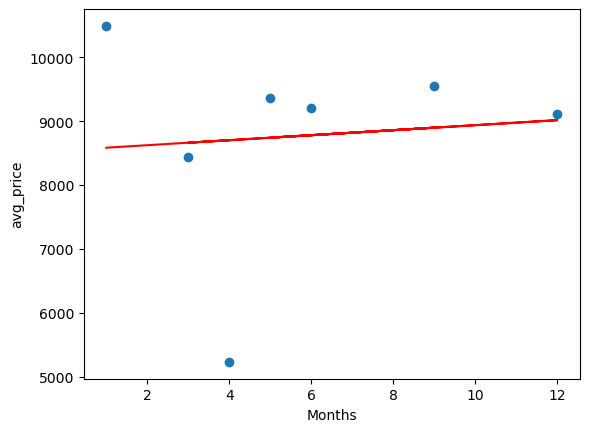

In [46]:
plotLinearRegression(price_months_comparison.reset_index()["Months"],price_months_comparison.reset_index()["avg_price"],"avg_duration",(6,-10))
plt.show()

In [38]:
average_price = df.groupby(['Source','Destination'])['Price'].mean().reset_index()
average_price

,Source,Destination,Price
0,Banglore,Delhi,5143.918577
1,Banglore,New Delhi,11917.716738
2,Chennai,Kolkata,4789.892388
3,Delhi,Cochin,10540.113536
4,Kolkata,Banglore,9158.389411
5,Mumbai,Hyderabad,5042.083333


In [45]:
# finding the average price for each airline
Average_Airline_price = df.groupby('Airline')['Price'].mean()

summary_statistics = pd.DataFrame({"Average Airline TIcket Price":Average_Airline_price})
summary_statistics



,Average Airline TIcket Price
Airline,
Air Asia,5590.260188
Air India,9608.019429
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


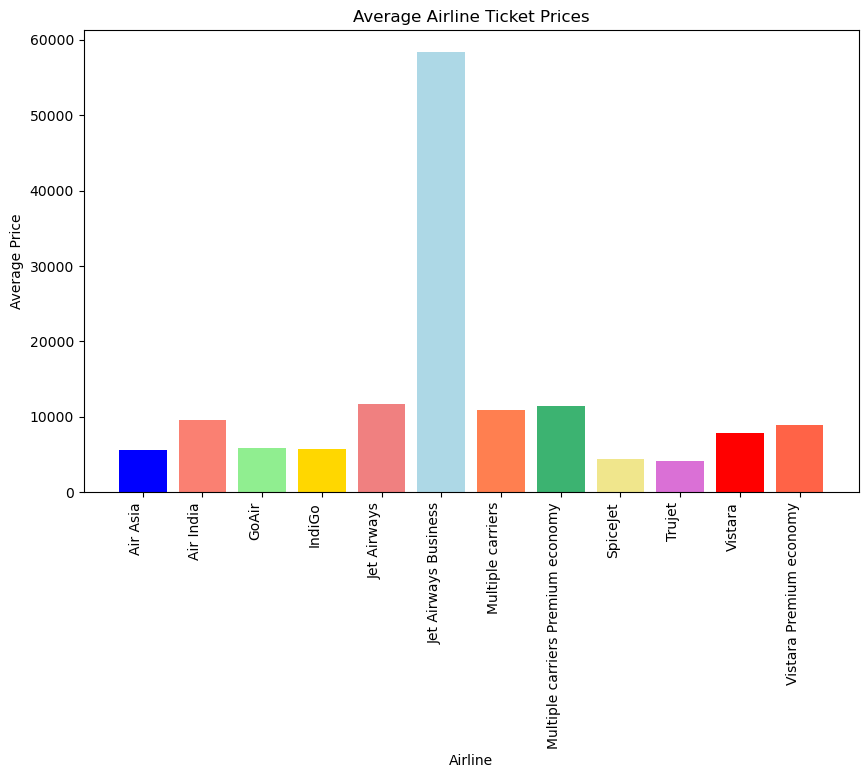

In [46]:
# Create a list of 12 distinct colors
colors = ['blue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightblue',
          'coral', 'mediumseagreen', 'khaki', 'orchid', 'red', 'tomato']

plt.figure(figsize=(10, 6))
bar_chart = plt.bar(summary_statistics.index,summary_statistics['Average Airline TIcket Price'],color=colors)
plt.title('Average Airline Ticket Prices')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [39]:
print(df['Total_Stops'].value_counts())

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [40]:
df.groupby(['Source','Destination'])['Total_Stops'].value_counts()

Source    Destination  Total_Stops
Banglore  Delhi        non-stop       1265
          New Delhi    1 stop          562
                       non-stop        287
                       2 stops          75
                       3 stops           7
                       4 stops           1
Chennai   Kolkata      non-stop        381
Delhi     Cochin       1 stop         3185
                       2 stops        1113
                       non-stop        213
                       3 stops          25
Kolkata   Banglore     1 stop         1834
                       non-stop        724
                       2 stops         302
                       3 stops          11
Mumbai    Hyderabad    non-stop        621
                       1 stop           44
                       2 stops          29
                       3 stops           2
Name: Total_Stops, dtype: int64

In [41]:
df1=df.drop(['Airline', 'index', 'Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Months'], axis=1)
df1

,Source,Destination,Total_Stops,Price
0,Banglore,New Delhi,1 stop,26890
1,Banglore,New Delhi,1 stop,7744
2,Banglore,New Delhi,1 stop,27992
3,Banglore,New Delhi,2 stops,17135
4,Banglore,New Delhi,1 stop,25735
...,...,...,...,...
10678,Delhi,Cochin,1 stop,11622
10679,Kolkata,Banglore,1 stop,5069
10680,Delhi,Cochin,1 stop,14714
10681,Kolkata,Banglore,1 stop,5192


In [51]:
df1=df1.groupby(['Source', 'Destination', 'Total_Stops'])['Price'].mean().reset_index()
df1['Price']=df1['Price'].round()
df1

,Source,Destination,Total_Stops,Price
0,Banglore,Delhi,non-stop,5144.0
1,Banglore,New Delhi,1 stop,14017.0
2,Banglore,New Delhi,2 stops,13323.0
3,Banglore,New Delhi,3 stops,12761.0
4,Banglore,New Delhi,4 stops,17686.0
5,Banglore,New Delhi,non-stop,7400.0
6,Chennai,Kolkata,non-stop,4790.0
7,Delhi,Cochin,1 stop,10031.0
8,Delhi,Cochin,2 stops,12752.0
9,Delhi,Cochin,3 stops,12940.0


In [43]:
Banglore_New_Delhi=df1.drop([0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
Banglore_New_Delhi

,Source,Destination,Total_Stops,Price
1,Banglore,New Delhi,1 stop,14017.0
2,Banglore,New Delhi,2 stops,13323.0
3,Banglore,New Delhi,3 stops,12761.0
4,Banglore,New Delhi,4 stops,17686.0
5,Banglore,New Delhi,non-stop,7400.0


Text(0.5, 1.0, 'Average Ticket Price / Number of Stops Comparison(Banglore_New Delhi)')

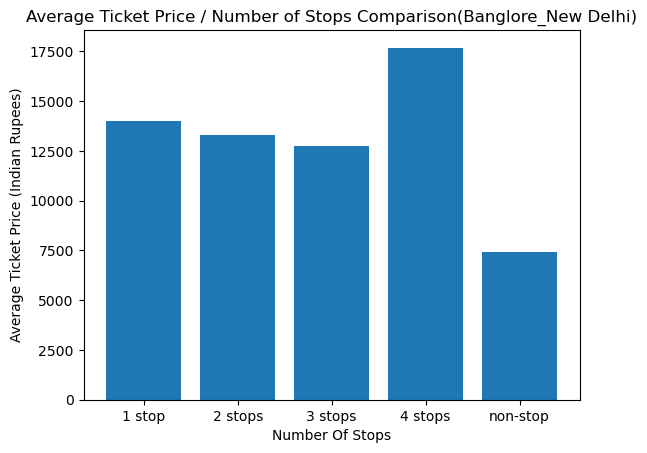

In [52]:
plt.bar(Banglore_New_Delhi['Total_Stops'],Banglore_New_Delhi['Price'])
plt.xlabel("Number Of Stops")
plt.ylabel("Average Ticket Price (Indian Rupees)")
plt.title("Average Ticket Price / Number of Stops Comparison(Banglore_New Delhi)")

In [44]:
Kolkata_Banglore=df1.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18])
Kolkata_Banglore

,Source,Destination,Total_Stops,Price
11,Kolkata,Banglore,1 stop,10477.0
12,Kolkata,Banglore,2 stops,12036.0
13,Kolkata,Banglore,3 stops,13151.0
14,Kolkata,Banglore,non-stop,4556.0


Text(0.5, 1.0, 'Average Ticket Price / Number of Stops Comparison(Kolkata_Banglore)')

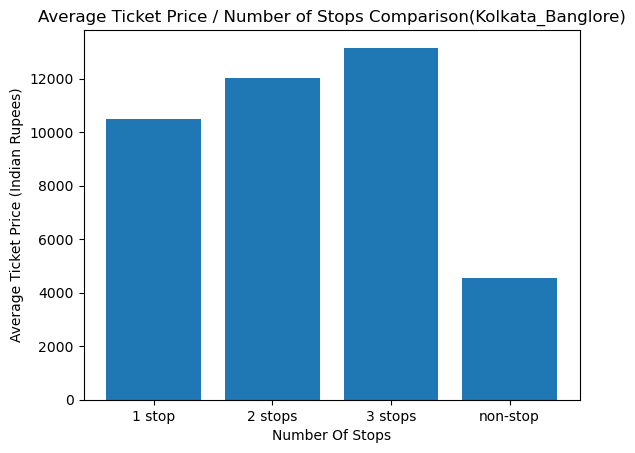

In [53]:
plt.bar(Kolkata_Banglore['Total_Stops'],Kolkata_Banglore['Price'])
plt.xlabel("Number Of Stops")
plt.ylabel("Average Ticket Price (Indian Rupees)")
plt.title("Average Ticket Price / Number of Stops Comparison(Kolkata_Banglore)")

In [47]:
df['Price'].max()

79512

In [48]:
df['Price'].min()

1759

In [49]:
#Establish the bins

size_bins = [1759,30000,60000,80000]

#Create bin labels

bin_labels = ['Cheap','Medium','Expensive']

# Cut the data into bins
df['Price_bins'] = pd.cut(df['Price'], bins=size_bins, labels=bin_labels, right=False)

# Display the DataFrame with the new 'price_bins' column
df.tail(10)

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Months,Price_bins
10673,6011,Multiple carriers,2019-12-06,Delhi,Cochin,DEL - BOM - COK,19:00,01:30 13 Jun,6.50,1 stop,6795,12,Cheap
10674,2335,Jet Airways,2019-12-06,Kolkata,Banglore,CCU - BOM - BLR,20:00,12:00 13 Jun,16.00,1 stop,13044,12,Cheap
10675,3241,Jet Airways,2019-12-06,Kolkata,Banglore,CCU - GAU - BLR,10:20,17:35,7.25,1 stop,8355,12,Cheap
10676,9870,Jet Airways,2019-12-06,Kolkata,Banglore,CCU - BOM - BLR,16:30,12:00 13 Jun,19.50,1 stop,13044,12,Cheap
10677,7242,Jet Airways,2019-12-06,Kolkata,Banglore,CCU - BOM - BLR,14:05,20:45,6.67,1 stop,9899,12,Cheap
10678,9873,Multiple carriers,2019-12-06,Delhi,Cochin,DEL - BOM - COK,09:15,19:00,9.75,1 stop,11622,12,Cheap
10679,5993,IndiGo,2019-12-06,Kolkata,Banglore,CCU - MAA - BLR,08:10,13:00,4.83,1 stop,5069,12,Cheap
10680,7260,Jet Airways,2019-12-06,Delhi,Cochin,DEL - BOM - COK,22:50,19:00 13 Jun,20.17,1 stop,14714,12,Cheap
10681,4997,Air Asia,2019-12-06,Kolkata,Banglore,CCU - DEL - BLR,07:35,23:30,15.92,1 stop,5192,12,Cheap
10682,1081,Jet Airways,2019-12-06,Delhi,Cochin,DEL - BOM - COK,21:50,04:25 13 Jun,6.58,1 stop,10262,12,Cheap


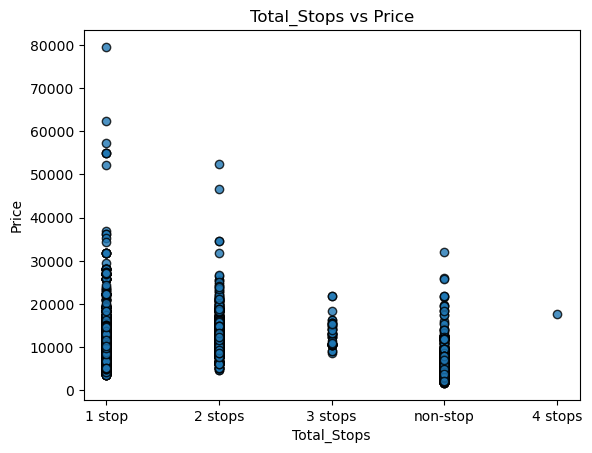

In [56]:
plt.scatter(df["Total_Stops"],df["Price"],edgecolor="black", marker='o', alpha=0.8)
# Incorporate the other graph properties
plt.title("Total_Stops vs Price")
plt.ylabel("Price")
plt.xlabel("Total_Stops")
plt.grid(False)